# Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:
Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.
Data Analysis Process
Remember the process:
Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting
Instructions
Import the necessary libraries.

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

Change effective to date column to datetime format.

Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

Plot a correlation matrix, comment what you see.

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

Comment what you can see in the plots.

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Rename the columns so they follow the PE8 (snake case)

cols = []
for c in customer_df.columns:
    c = c.replace(' ', '_')
    cols.append(c.lower())
customer_df.columns = cols

In [6]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
# Change 'effective to date' column to datetime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
# Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

numerical_df = customer_df.select_dtypes(include='number')
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable 
# and do the same for discrete_df

for x in numerical_df.columns:
    print(f'"{x}" ({numerical_df[x].dtype}) has {numerical_df[x].nunique()} uniqe values:')
    print(numerical_df[x].unique())
    print()
    
#for cols in numerical_df.columns:
#    display(numerical_df[cols].value_counts(dropna=False))

"customer_lifetime_value" (float64) has 8041 uniqe values:
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]

"income" (int64) has 5694 uniqe values:
[56274     0 48767 ... 66367 71941 21941]

"monthly_premium_auto" (int64) has 202 uniqe values:
[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 2

In [10]:
def differentiate_var(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for col in df.columns:
        unique_values = df[col].nunique()

        if unique_values > 20:
            continuous_df[col] = df[col]
        else:
            discrete_df[col] = df[col]

    return continuous_df, discrete_df


continuous_df, discrete_df = differentiate_var(numerical_df)

In [11]:
# Plot a correlation matrix, comment what you see.

#X = numerical_df.drop(['total_claim_amount'], axis=1)
#y = numerical_df['total_claim_amount']

X = numerical_df

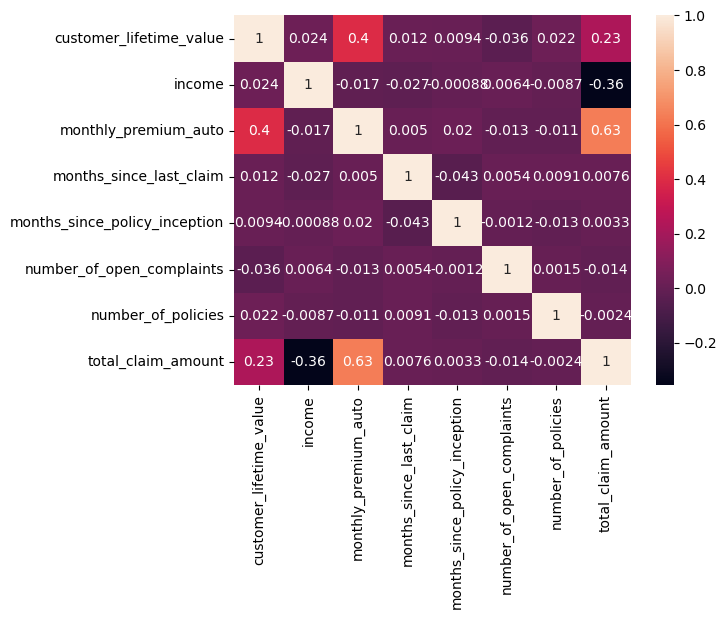

In [12]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Comment: There is a moderate positive correlation between the two variables: customer_lifetime_value and monthly_premium_auto.

In [13]:
# Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)

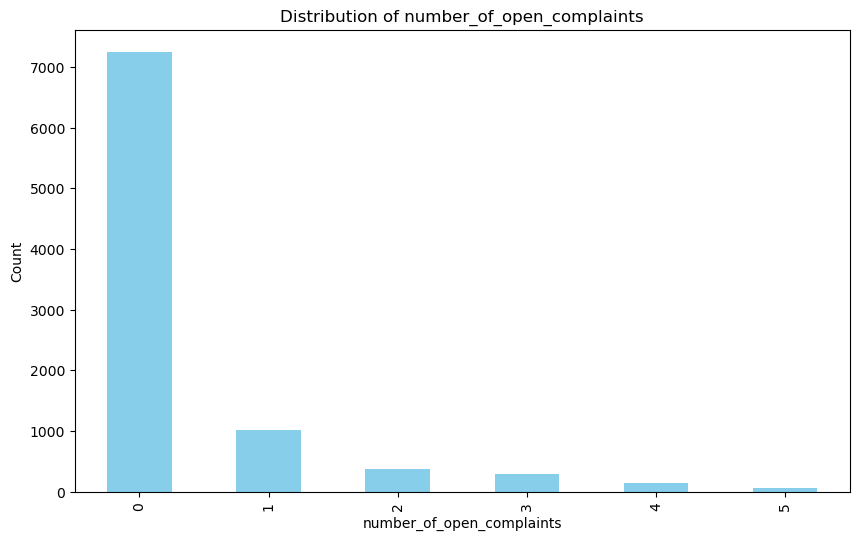

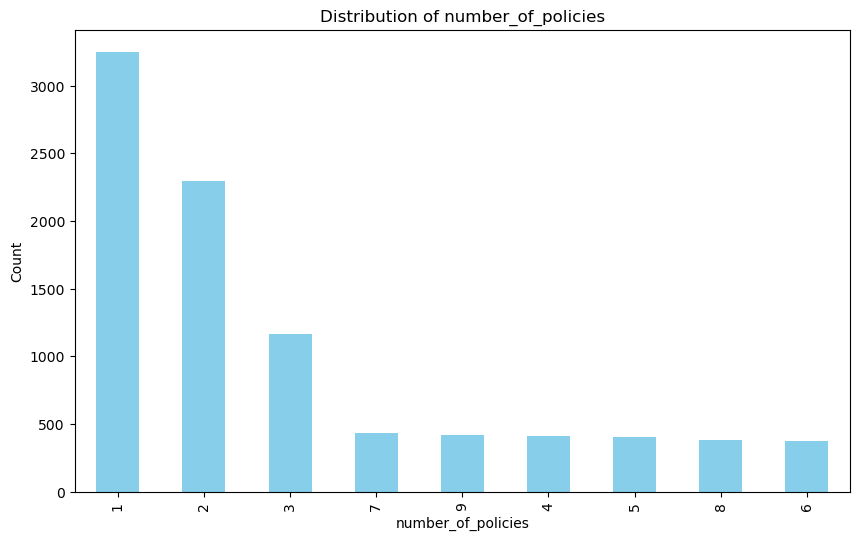

In [14]:
def plot_disc(df):
    for col in df.columns:
        balance_target = df[col].value_counts()
        balance_target.plot(kind='bar', figsize=(10, 6), color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

plot_disc(discrete_df)

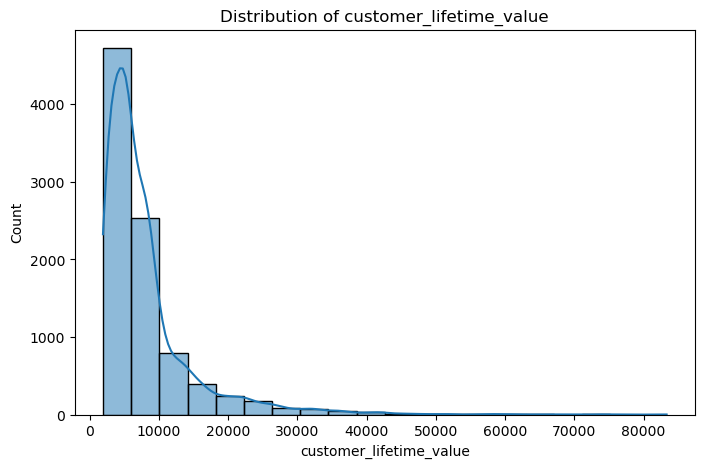

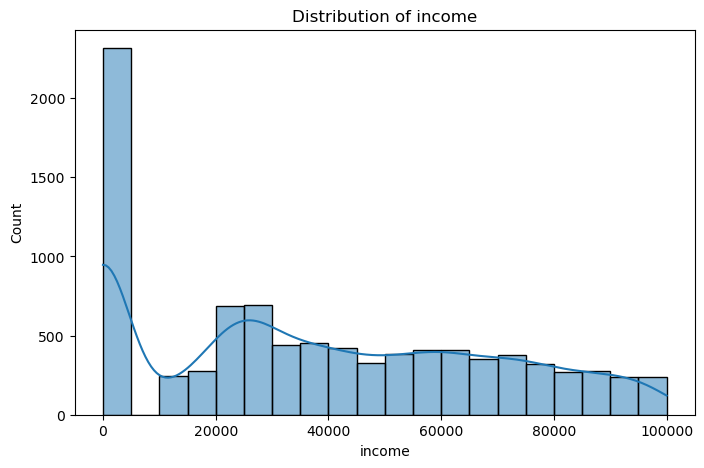

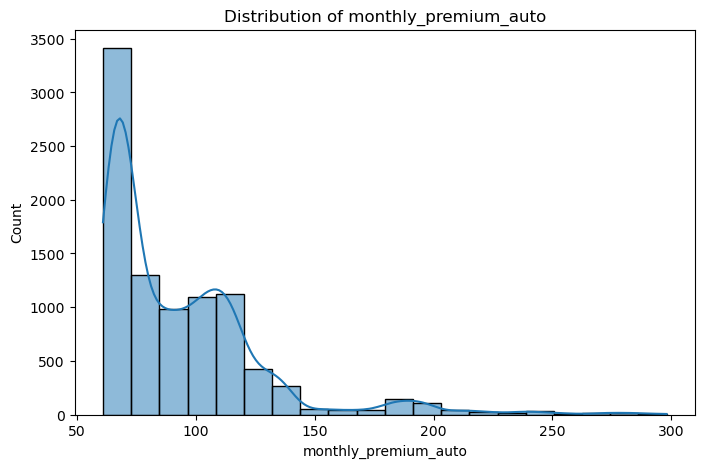

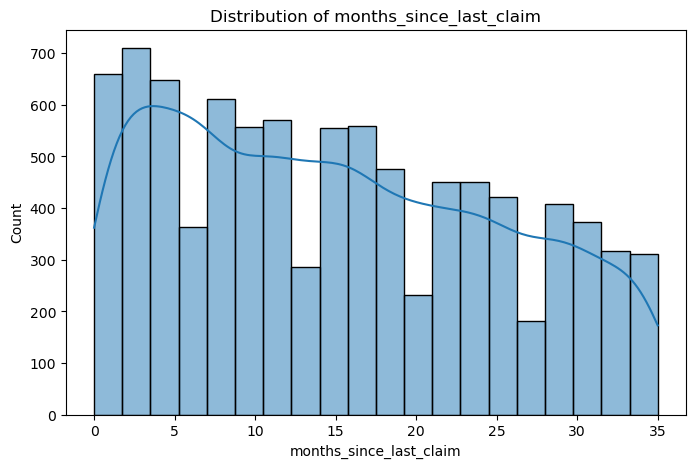

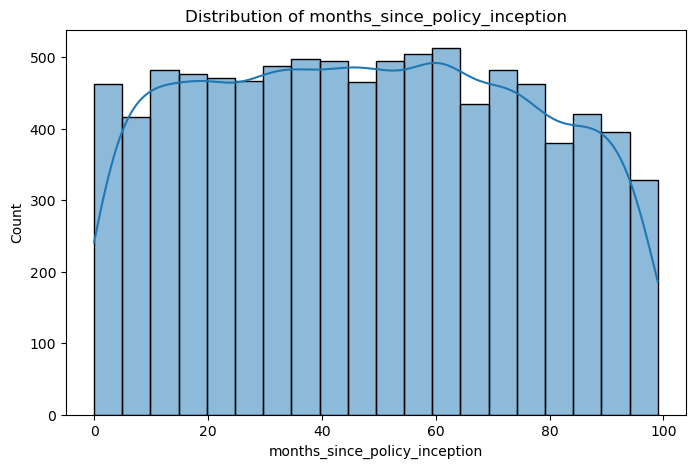

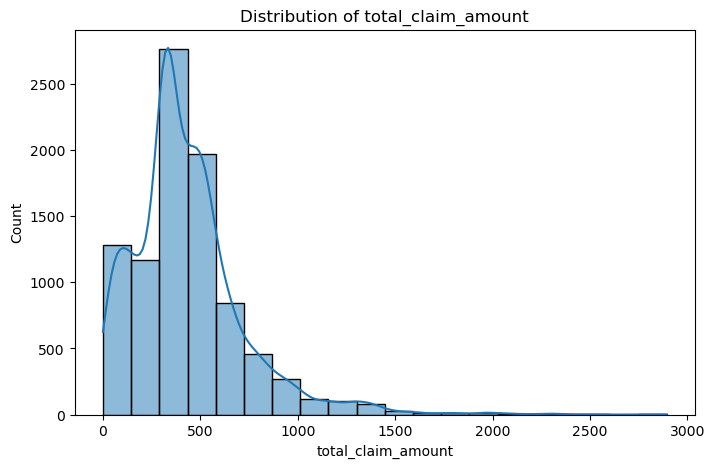

In [15]:
def plot_cont(df):
    for col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plot_cont(continuous_df)

In [16]:
#Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

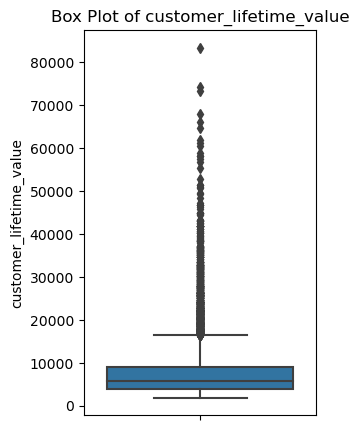

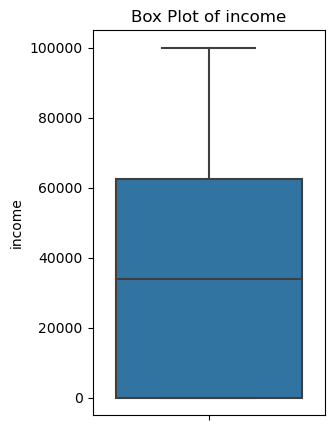

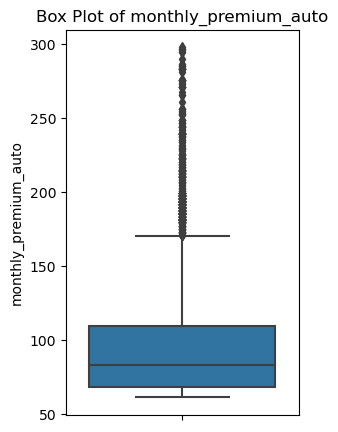

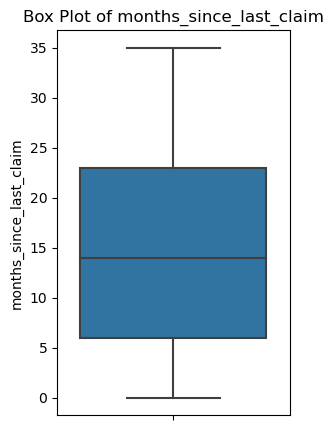

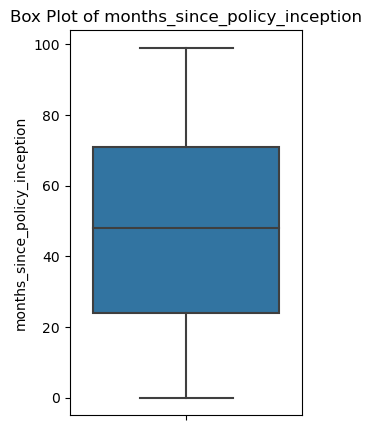

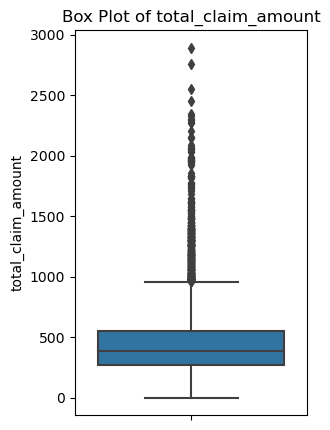

In [17]:
def plot_continuous_vars(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(3, 5))
            sns.boxplot(y=df[col])
            plt.title(f'Box Plot of {col}')
            plt.ylabel(col)
            plt.show()

plot_continuous_vars(continuous_df)

In [18]:
#Did you find outliers? Comment what you will do with them. 
#If you decide to remove them, do that now. Also, remove them from your main dataframe.





In [19]:
#Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [20]:
numerical_df.to_csv('numerical.csv', index=False)

# Lab | Cleaning categorical data
For this lab, we will be using the same notebook as in the previous lab.

Data Analysis Process
Remember the process:
Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting
Instructions
Open the notebook created for Lab-cleaning-numerical-data.

Find all of the categorical data. Save it in a categorical_df variable.

Check for NaN values and decide what to do with them, do it now.

Check all unique values of columns.

Check dtypes. Do they all make sense as categorical data?

Does any column contain alpha and numeric data? Decide how to clean it and do it now.

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [21]:
# Find all of the categorical data. Save it in a categorical_df variable.

categorical_df = customer_df.select_dtypes(include=['object'])

categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [22]:
#Check for NaN values and decide what to do with them, do it now.

categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [23]:
# Check all unique values of columns.
# Check dtypes. Do they all make sense as categorical data?

for x in categorical_df.columns:
    print(f'Column "{x}" (type: {categorical_df[x].dtype}) has {categorical_df[x].nunique()} uniqe values:')
    print(categorical_df[x].unique())
    print()
    
#for cols in categorical_df.columns:
#    display(categorical_df[cols].value_counts(dropna=False))

Column "customer" (type: object) has 9134 uniqe values:
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']

Column "state" (type: object) has 5 uniqe values:
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Column "response" (type: object) has 2 uniqe values:
['No' 'Yes']

Column "coverage" (type: object) has 3 uniqe values:
['Basic' 'Extended' 'Premium']

Column "education" (type: object) has 5 uniqe values:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Column "employmentstatus" (type: object) has 5 uniqe values:
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

Column "gender" (type: object) has 2 uniqe values:
['F' 'M']

Column "location_code" (type: object) has 3 uniqe values:
['Suburban' 'Rural' 'Urban']

Column "marital_status" (type: object) has 3 uniqe values:
['Married' 'Single' 'Divorced']

Column "policy_type" (type: object) has 3 uniqe values:
['Corporate Auto' 'Personal Auto' 'Special Auto']

Column "policy" (type: ob

In [24]:
for x in categorical_df.columns:
    print(categorical_df[x].value_counts(dropna=False))
    print()

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
D

In [25]:
# Does any column contain alpha and numeric data? Decide how to clean it and do it now.
# Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
# Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# Check number of unique values in each column, can they be combined in any way to ease encoding? 
# Comment your thoughts and make those changes.

In [26]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].replace({'Offer1': '1',
                                     'Offer2': '2',
                                     'Offer3': '3',
                                     'Offer4': '4'})

categorical_df['renew_offer_type'].unique()

array(['1', '3', '2', '4'], dtype=object)

In [27]:
# combining unique values to ease encoding
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace({
    'Four-Door Car': 'Standard',
    'Two-Door Car': 'Standard',
    'Luxury Car': 'Luxury',
    'SUV': 'SUV',
    'Luxury SUV': 'Luxury',
    'Sports Car': 'Sports'
})

categorical_df['vehicle_class'].unique()

array(['Standard', 'SUV', 'Luxury', 'Sports'], dtype=object)

In [28]:
categorical_df = categorical_df.drop(columns=['customer'])

In [29]:
# Comparing policy_type and policy - important informations
categorical_df['policy_type'] = categorical_df['policy_type'].replace({
    'Personal Auto': 'Personal',
    'Corporate Auto': 'Corporate',
    'Special Auto': 'Special'})

categorical_df['policy_type'].unique()

array(['Corporate', 'Personal', 'Special'], dtype=object)

In [30]:
categorical_df['policy'] = categorical_df['policy'].replace({
    'Corporate L1': 'L1',
    'Corporate L2': 'L2',
    'Corporate L3': 'L3',
    'Personal L1': 'L1',
    'Personal L2': 'L2',
    'Personal L3': 'L3',
    'Special L1': 'L1',
    'Special L2': 'L2',
    'Special L3': 'L3'})

categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [31]:
for x in categorical_df.columns:
    print(categorical_df[x].value_counts(dropna=False))
    print()

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

policy_type
Personal     6788
Corporate    1968
Special       378
Name: count, dtype: int64

policy
L3    4588
L2    2881
L1    1665
Name: count, dtyp

In [32]:
categorical_df.to_csv('categorical.csv', index=False)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.
Data Analysis Process
Remember the process:

    Case Study
    Get data
    Cleaning/Wrangling/EDA
    Processing Data
    Modeling -Validation
    Reporting

Instructions

    Open the categorical dataframe we created before.
    Plot all the categorical variables with the proper plot. What can you see?
    There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    Make any changes you feel are necessary.
    Plot time variable. Can you extract something from it?
    The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.


In [33]:
categorical_df['effective_to_date'] = customer_df['effective_to_date']

In [34]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,L3,1,Agent,Standard,Medsize,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,L3,3,Agent,Standard,Medsize,2011-01-31
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,L3,1,Agent,Standard,Medsize,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,L2,1,Call Center,SUV,Medsize,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,L1,1,Agent,Standard,Medsize,2011-02-03


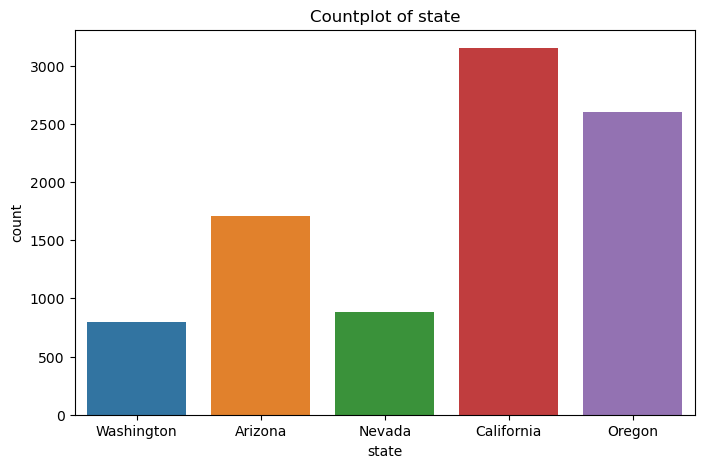

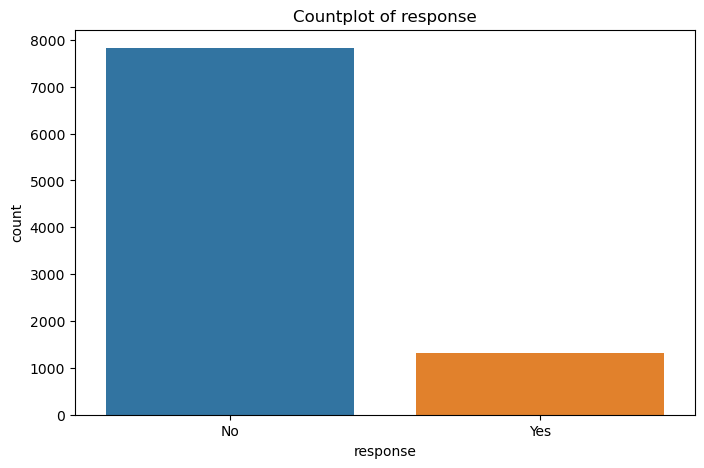

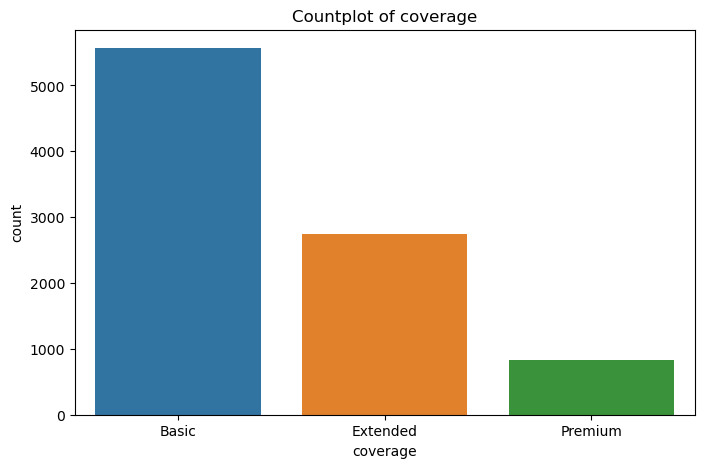

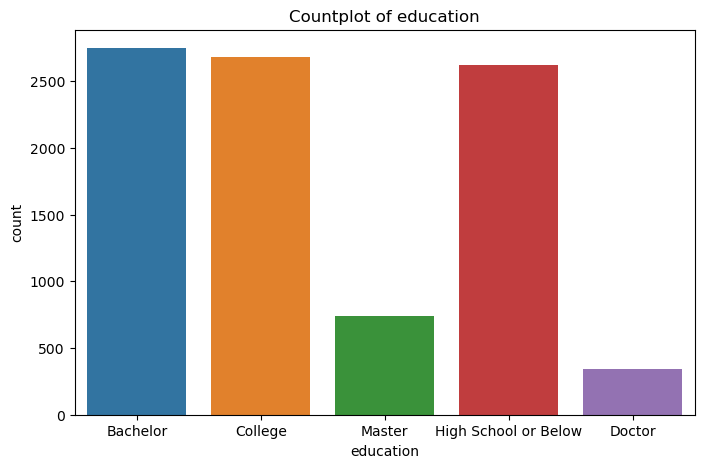

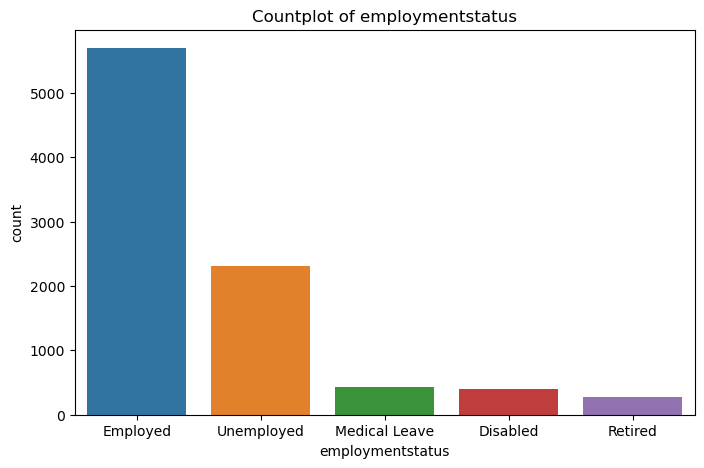

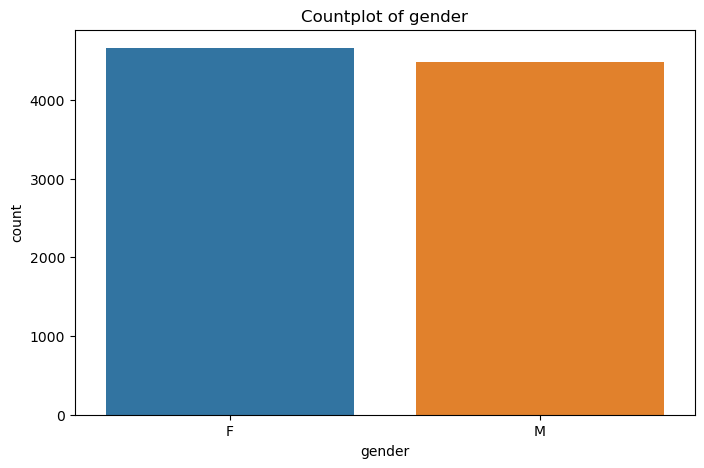

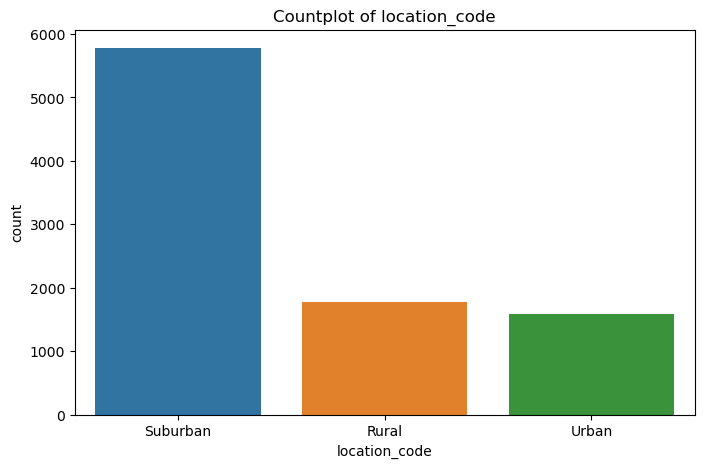

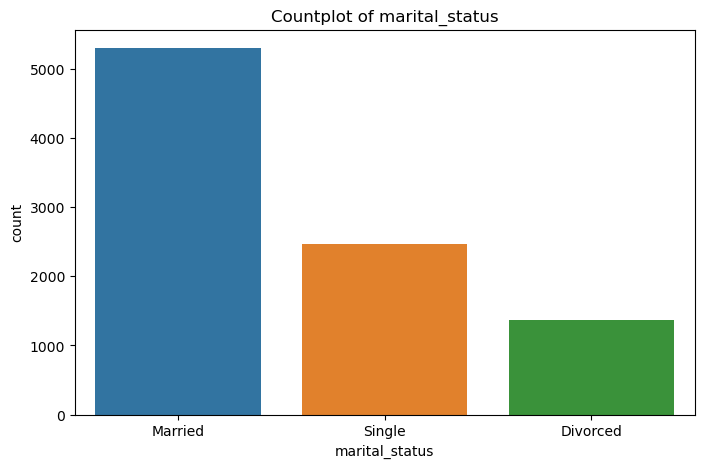

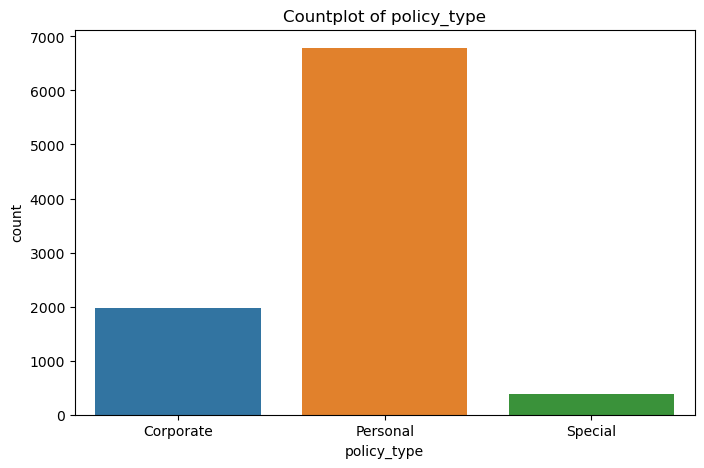

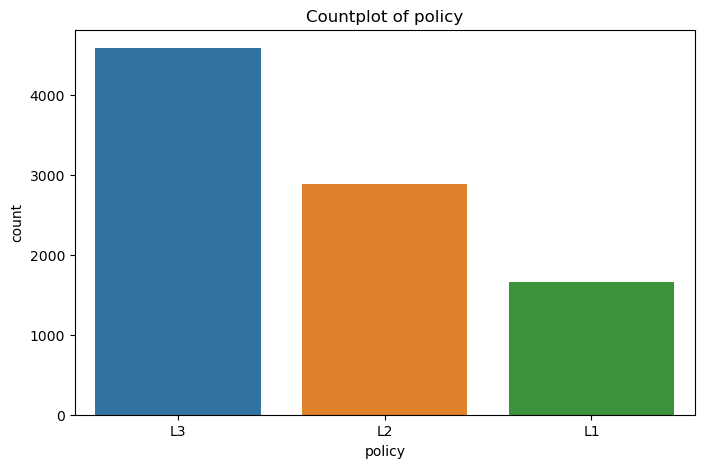

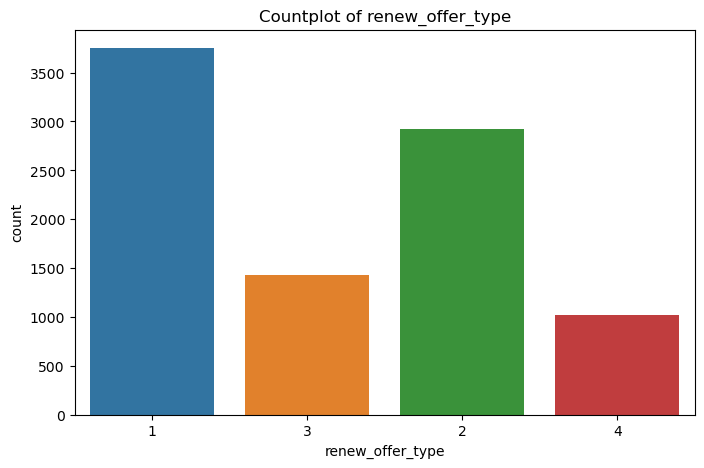

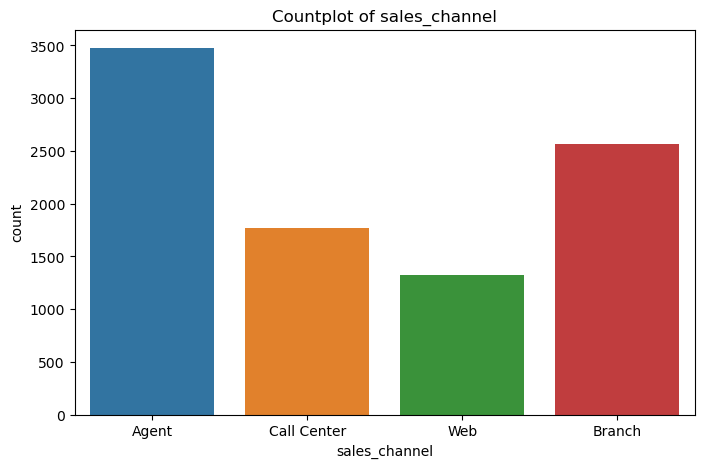

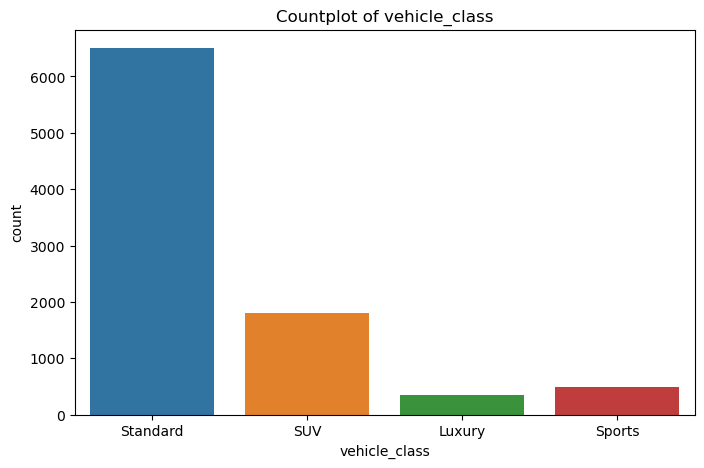

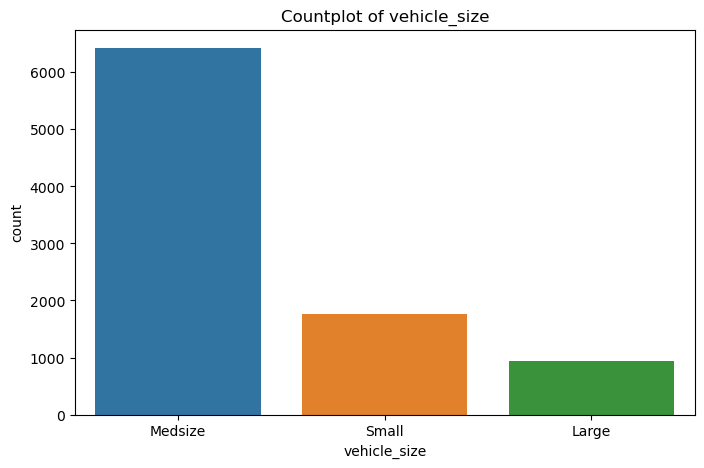

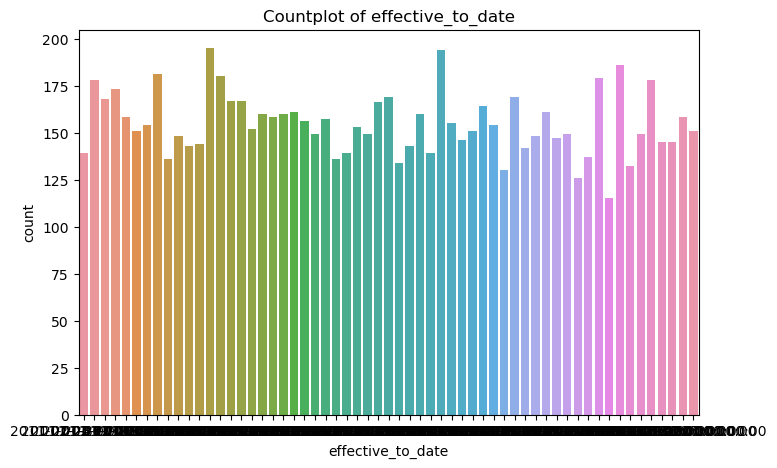

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in categorical_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=categorical_df)
    plt.title(f'Countplot of {column}')
    plt.show()

In [36]:
#The time variable can be useful. You shoud transform its data into a more useful form. 
#Hint: Day, week, and month as integers might be useful.

categorical_df['effective_to_day'] = categorical_df['effective_to_date'].dt.day
categorical_df['effective_to_week'] = categorical_df['effective_to_date'].dt.isocalendar().week
categorical_df['effective_to_month'] = categorical_df['effective_to_date'].dt.month

#categorical_df = categorical_df.drop('effective_to_date', axis=1)

categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,effective_to_day,effective_to_week,effective_to_month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,L3,1,Agent,Standard,Medsize,2011-02-24,24,8,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,L3,3,Agent,Standard,Medsize,2011-01-31,31,5,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,L3,1,Agent,Standard,Medsize,2011-02-19,19,7,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,L2,1,Call Center,SUV,Medsize,2011-01-20,20,3,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,L1,1,Agent,Standard,Medsize,2011-02-03,3,5,2
